# 🌿 🧠 Understanding Convolutional Neural Networks - Simplified

Welcome to this beginner-friendly guide on Convolutional Neural Networks (CNNs)! In this notebook, we'll break down the concepts of CNNs in a simple and clear manner. By the end, you'll have a solid understanding of how CNNs work and how to create one using Python.

## Introduction to CNNs

A Convolutional Neural Network (CNN) is a type of deep learning model designed to process structured grid data, such as images. CNNs are particularly effective for image recognition and classification tasks because they can automatically detect important features in images.

### Key Components of CNNs
- **Convolutional Layer:** The core building block of a CNN that performs convolution operations. It applies a set of filters to the input image to extract features like edges, textures, and patterns.

- **Pooling Layer:** A layer that reduces the spatial dimensions of the feature maps, typically using max pooling or average pooling. This helps in reducing the computational load and preventing overfitting.

- **Fully Connected Layer:** A layer where each neuron is connected to all neurons in the previous layer. This layer is used to make final predictions based on the extracted features.

- **Activation Function:** A function applied to the output of a layer to introduce non-linearity. Common activation functions include ReLU, Sigmoid, and Tanh.

## Building a CNN with TensorFlow and Keras

Let's build a simple CNN to classify images from the CIFAR-10 dataset using TensorFlow and Keras.


In [1]:
# Importing Libraries and Suppressing Duplicate Registration Warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow logging
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Checking GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  2


### Loading and Preprocessing Data

First, we need to load the CIFAR-10 dataset and preprocess it. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.


In [2]:
# Loading and Preprocessing Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Converting class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### Building the CNN

Next, we'll build a simple CNN with the following architecture:
1. **Conv2D Layer:** 32 filters, kernel size 3x3, ReLU activation
2. **MaxPooling2D Layer:** Pool size 2x2
3. **Conv2D Layer:** 64 filters, kernel size 3x3, ReLU activation
4. **MaxPooling2D Layer:** Pool size 2x2
5. **Flatten Layer:** Flatten the 3D feature maps to 1D feature vectors
6. **Dense Layer:** 512 neurons, ReLU activation
7. **Dropout Layer:** Dropout rate 0.5
8. **Dense Layer:** 10 neurons (one for each class), Softmax activation


In [3]:
# Building the CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Compiling the Model

We need to compile the model by specifying the optimizer, loss function, and metrics. We'll use the Adam optimizer, categorical crossentropy loss function, and accuracy as the evaluation metric.


In [4]:
# Compiling the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Training the Model

Now, we'll train the model using the training data. We'll set the number of epochs to 10 and use 20% of the training data for validation.


In [5]:
# Training the Model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64)


Epoch 1/10
 52/625 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1941 - loss: 2.2224

I0000 00:00:1716828526.837804      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716828526.855884      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


615/625 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3617 - loss: 1.7708

W0000 00:00:1716828529.671737      69 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3632 - loss: 1.7669 - val_accuracy: 0.5689 - val_loss: 1.2329
Epoch 2/10
 56/625 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5300 - loss: 1.2896

W0000 00:00:1716828530.535894      69 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5637 - loss: 1.2232 - val_accuracy: 0.6209 - val_loss: 1.0804
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6339 - loss: 1.0421 - val_accuracy: 0.6419 - val_loss: 1.0077
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6697 - loss: 0.9479 - val_accuracy: 0.6882 - val_loss: 0.9080
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6982 - loss: 0.8538 - val_accuracy: 0.6984 - val_loss: 0.8701
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7279 - loss: 0.7745 - val_accuracy: 0.7089 - val_loss: 0.8583
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7460 - loss: 0.7249 - val_accuracy: 0.6915 - val_loss: 0.8898
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7685 - loss: 0.6610 - val_accuracy: 0.7156 - val_loss: 0.8159
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7893 - loss: 0.6076 - val_accuracy: 0.7243 - val_

### Evaluating the Model

After training, we'll evaluate the model using the test data to determine its accuracy.


In [6]:
# Evaluating the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)


101/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7021 - loss: 0.8622

W0000 00:00:1716828550.000012      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7087 - loss: 0.8601

Test accuracy: 0.7138000130653381


### Plotting Training and Validation Metrics

Finally, we'll visualize the training and validation accuracy and loss over epochs to understand the model's performance.


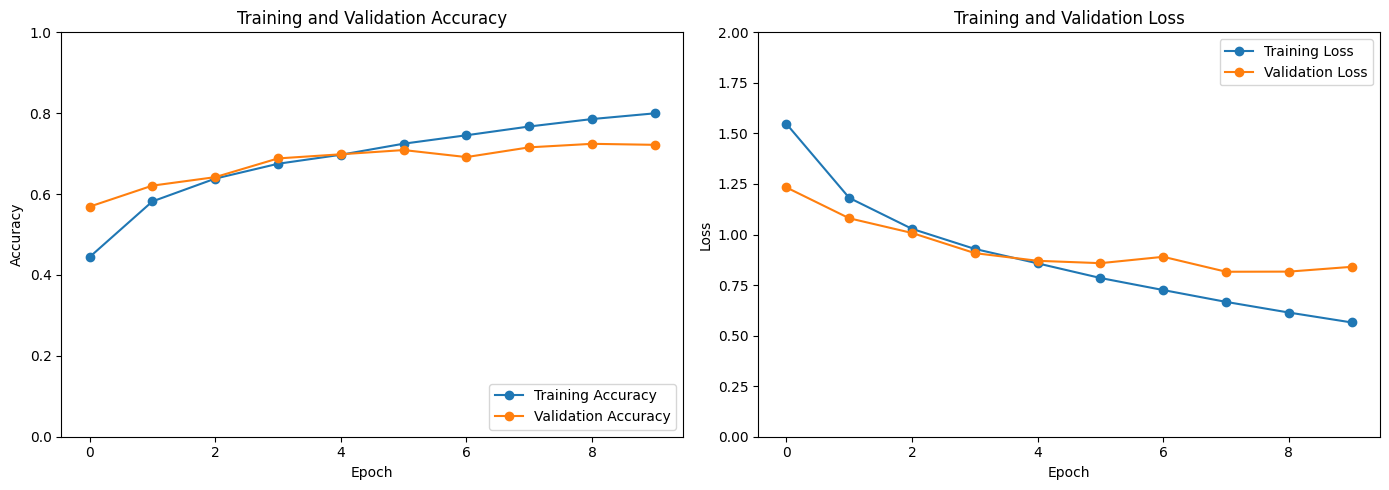

In [7]:
# Plotting Training and Validation Metrics
plt.figure(figsize=(14, 5))

# Plotting Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


## Conclusion

In this notebook, we covered the basics of Convolutional Neural Networks (CNNs), built a simple CNN to classify images from the CIFAR-10 dataset, and visualized the training process. CNNs are powerful tools for image classification, and with this foundation, you're ready to explore more advanced topics and architectures.

Happy learning!
